In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

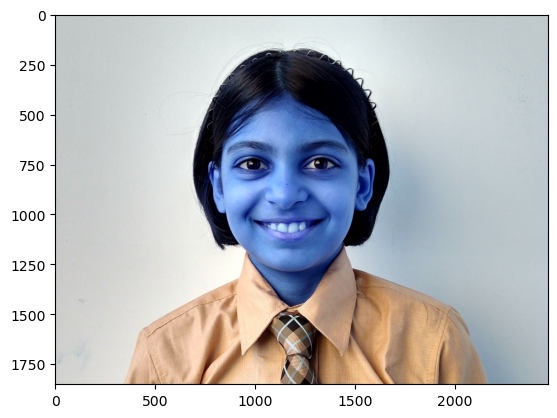

In [32]:
img = cv2.imread("/Users/shrutikarandikar/development/Shruti.jpg")
plt.imshow(img)

In [ ]:
## Understanding that an image is just a multidimentional numpy array. 
print(type(img))
print(img.shape)
print(img.ndim)
print(img.size)
print(img.dtype)


<class 'numpy.ndarray'>
(1851, 2467, 3)
3
13699251
uint8


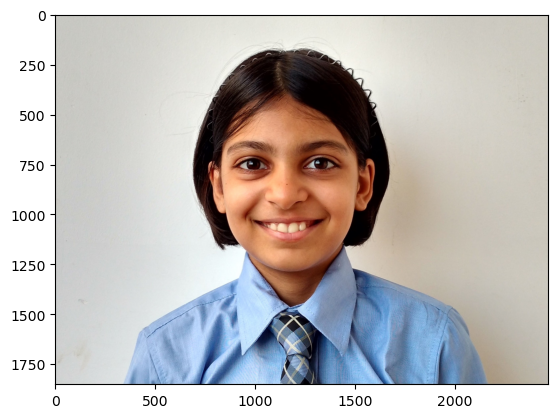

In [ ]:
## I look like an Avatar charecter! The smallest dimention is 3 which represents the colors. cv2 by default thinks is BGR but 
## with matplotlib we change the order to get the right image. 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [103]:
print(img.shape)

(1851, 2467, 3)


Reduce the size of the image by 50% by manually selecting alternate rows and then alternate columns. But I am losing information. 

In [46]:
a = np.zeros([img.shape[0]//2, img.shape[1]//2 , 3],dtype = "uint8") 
rows = img.shape[0]
cols = img.shape[1]
print(rows, cols)
for r in range(rows):
    if r // 2 == a.shape[0]:
        break
    if r % 2 == 0:
        for c in range(cols):
            if c // 2 == a.shape[1]:
                break
            if c % 2 == 0:
                a[r//2, c//2] = img[r , c]

1851 2467


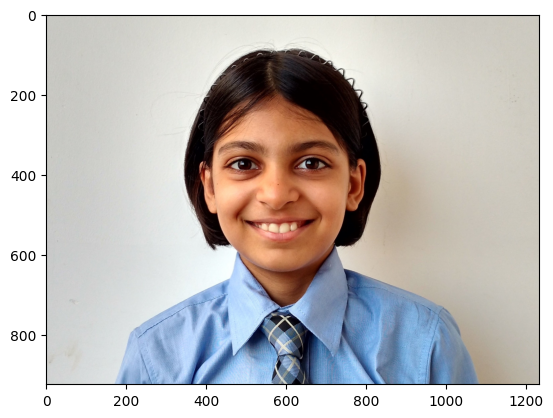

In [47]:
plt.imshow(a)

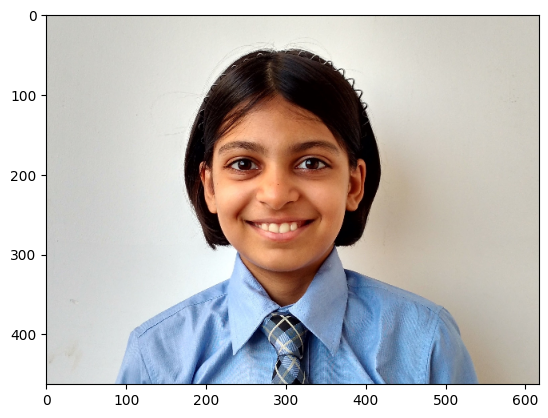

In [ ]:
## Simple code to do the same using numpy
plt.imshow(a[::2, ::2,:])

# Filters 

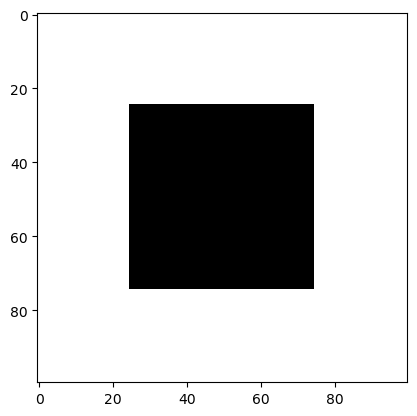

In [50]:
test_img = np.ones((100, 100, 3))
test_img[25:75, 25:75, :] = 0
plt.imshow(test_img)

In [82]:
print(test_img.dtype)

float64


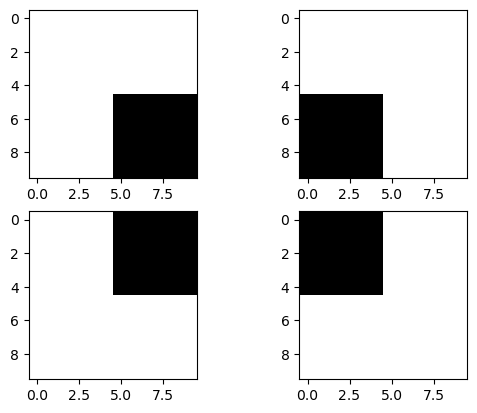

In [56]:
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(test_img[20:30, 20:30, :])
ax[0,1].imshow(test_img[20:30, 70:80, :]) 
ax[1,0].imshow(test_img[70:80, 20:30, :])
ax[1,1].imshow(test_img[70:80, 70:80, :]) 


In [57]:
print(test_img.shape)

(100, 100, 3)


In [58]:
blur_filter = np.ones([3,3])
blur_filter[0,0] = 1
blur_filter[0,2] = 1
blur_filter[2,0] = 1
blur_filter[2,2] = 1
blur_filter[1,1] = 1
print(blur_filter)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [95]:
# A filter of 11x11
mega_blur = np.ones([11,11]) * 1.0

This 'center-weighted' filter - larger wt for center and smaller for the sorrounding ones

In [65]:
center_weighted_filter = np.ones([3,3])
center_weighted_filter[0,0] = 0.5
center_weighted_filter[0,2] = 0.5
center_weighted_filter[2,0] = 0.5
center_weighted_filter[2,2] = 0.5
center_weighted_filter[1,1] = 2
print(center_weighted_filter)
print(center_weighted_filter.dtype)

[[0.5 1.  0.5]
 [1.  2.  1. ]
 [0.5 1.  0.5]]
float64


In [97]:
# img *has* to have values between 0 & 1, dtype = 'float64'
def filter_image(img, filter, f=1):
    newimage = np.empty_like(img)
    d0 = filter.shape[0] // 2
    d1 = filter.shape[1] // 2
    
    
    for r in range(d0, img.shape[0]-d0):
        for c in range(d1, img.shape[1]-d1):
            newimage[r,c,0] = np.sum(img[r-d0:r+d0+1,c-d1:c+d1+1, 0] * filter) / f
            newimage[r,c,1] = np.sum(img[r-d0:r+d0+1,c-d1:c+d1+1, 1] * filter) / f
            newimage[r,c,2] = np.sum(img[r-d0:r+d0+1,c-d1:c+d1+1, 2] * filter) / f

    return newimage

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1152983679240113e+277].


image1
[[1.         1.         1.         1.         0.88888889 0.77777778
  0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         1.         1.         1.         0.77777778 0.55555556
  0.33333333 0.33333333 0.33333333 0.33333333]]
image2
[[1.     1.     1.     1.     0.9375 0.8125 0.75   0.75   0.75   0.75  ]
 [1.     1.     1.     1.     0.8125 0.4375 0.25   0.25   0.25   0.25  ]]


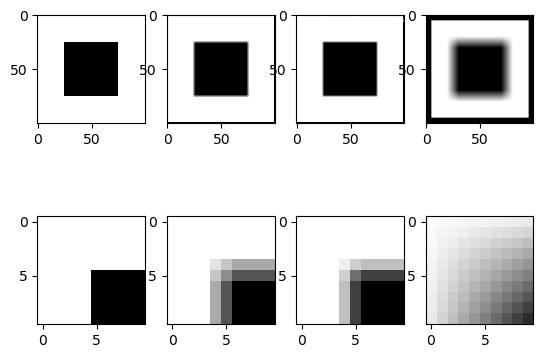

In [98]:
img1 = filter_image(test_img, blur_filter, np.sum(blur_filter))
img2 = filter_image(test_img, center_weighted_filter, np.sum(center_weighted_filter))
img3 = filter_image(test_img, mega_blur, np.sum(mega_blur))

fig, ax = plt.subplots(2, 4)
ax[0,0].imshow(test_img)
ax[0,1].imshow(img1) 
ax[0,2].imshow(img2)
ax[0,3].imshow(img3)
ax[1,0].imshow(test_img[20:30, 20:30, :])
ax[1,1].imshow(img1[20:30, 20:30, :]) 
ax[1,2].imshow(img2[20:30, 20:30, :])
ax[1,3].imshow(img3[20:30, 20:30, :])

## We can see the difference between blur_filter and center_weighted_filter when we print the calculated values. 
# img1 is 0.88 and img2 is 0.93. We can sightly see how img1 is darker as well. 

print("image1")
print(img1[24:26, 20:30, 0])
print("image2")
print(img2[24:26, 20:30, 0])


when we use the filter for rows and columns, it extend beyond the image boundaries. THis is called overflow. We can solve this issue by padding the image. 

In [140]:
# Filter to the 1st/last row/column so that they are also processed (0 padding)
def filter_image_padding(img, filter, f=1):
    newimage = np.empty_like(img)
    
    d0 = filter.shape[0] // 2
    padded = np.pad(img, ((d0,d0), (d0,d0), (0,0)), mode='constant', constant_values=(0, 0))
    
    for r in range(d0, padded.shape[0]-d0):
        for c in range(d0, padded.shape[1]-d0):
            
            newimage[r-d0,c-d0,0] = np.sum(padded[r-d0:r+d0+1, c-d0:c+d0+1, 0] * filter) / f
            newimage[r-d0,c-d0,1] = np.sum(padded[r-d0:r+d0+1, c-d0:c+d0+1, 1] * filter) / f
            newimage[r-d0,c-d0,2] = np.sum(padded[r-d0:r+d0+1, c-d0:c+d0+1, 2] * filter) / f
        
        if r % 200 == 0:
            print("Done with row:", r)    

    return newimage


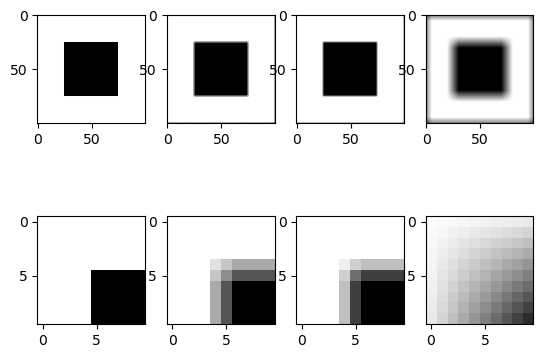

In [141]:
img1 = filter_image_padding(test_img, blur_filter, np.sum(blur_filter))
img2 = filter_image_padding(test_img, center_weighted_filter, np.sum(center_weighted_filter))
img3 = filter_image_padding(test_img, mega_blur, np.sum(mega_blur))

fig, ax = plt.subplots(2, 4)
ax[0,0].imshow(test_img)
ax[0,1].imshow(img1) 
ax[0,2].imshow(img2)
ax[0,3].imshow(img3)
ax[1,0].imshow(test_img[20:30, 20:30, :])
ax[1,1].imshow(img1[20:30, 20:30, :]) 
ax[1,2].imshow(img2[20:30, 20:30, :])
ax[1,3].imshow(img3[20:30, 20:30, :])

Done with row: 200
Done with row: 400
Done with row: 600
Done with row: 800
Done with row: 1000
Done with row: 1200
Done with row: 1400
Done with row: 1600
Done with row: 1800
Done with row: 200
Done with row: 400
Done with row: 600
Done with row: 800
Done with row: 1000
Done with row: 1200
Done with row: 1400
Done with row: 1600
Done with row: 1800
Done with row: 200
Done with row: 400
Done with row: 600
Done with row: 800
Done with row: 1000
Done with row: 1200
Done with row: 1400
Done with row: 1600
Done with row: 1800


(1851, 2467)

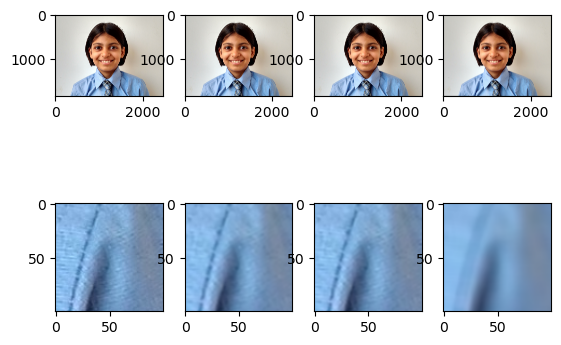

In [142]:
img1 = filter_image_padding(img, blur_filter, np.sum(blur_filter))
img2 = filter_image_padding(img, center_weighted_filter, np.sum(center_weighted_filter))
img3 = filter_image_padding(img, mega_blur, np.sum(mega_blur))

fig, ax = plt.subplots(2, 4)
ax[0,0].imshow(img)
ax[0,1].imshow(img1) 
ax[0,2].imshow(img2)
ax[0,3].imshow(img3)
ax[1,0].imshow(img[1600:1700, 1900:2000 :])
ax[1,1].imshow(img1[1600:1700, 1900:2000 :]) 
ax[1,2].imshow(img2[1600:1700, 1900:2000 :])
ax[1,3].imshow(img3[1600:1700, 1900:2000 :])
1851, 2467,